Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [188]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
    

In [189]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

with open('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)
    
with open('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)

#daily_engagement = 
#project_submissions = 

## Fixing Data Types

In [190]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [191]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [192]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])
    
project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [193]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

uniqueAccounts =[]
#count = 0 Not needed, use len(uniqueAccounts) instead
for record in enrollments:
    if record['account_key'] not in uniqueAccounts:
        uniqueAccounts.append(record['account_key'])
#        count+= 1

enrollment_num_rows = len(enrollments)             # Replace this with your code
enrollment_num_unique_students = len(uniqueAccounts)  # Replace this with your code

print "number of rows in enrollments is :", len(enrollments)
print "number of unique accounts in enrollments is :", len(uniqueAccounts)
print ""


uniqueAccounts =[]
for record in daily_engagement:
    if record['acct'] not in uniqueAccounts:
        uniqueAccounts.append(record['acct'])

engagement_num_rows = len(daily_engagement)             # Replace this with your code
engagement_num_unique_students = len(uniqueAccounts)  # Replace this with your code

print "number of rows in daily_engagement is :", len(daily_engagement)
print "number of unique accounts is :", len(uniqueAccounts)
print ""

uniqueAccounts =[]
for record in project_submissions:
    if record['account_key'] not in uniqueAccounts:
        uniqueAccounts.append(record['account_key'])
        
submission_num_rows = len(project_submissions)             # Replace this with your code
submission_num_unique_students = len(uniqueAccounts)  # Replace this with your code
        
print "number of rows in project_submissions is :", len(project_submissions)
print "number of unique accounts is :", len(uniqueAccounts)
print ""

number of rows in enrollments is : 1640
number of unique accounts in enrollments is : 1302

number of rows in daily_engagement is : 136240
number of unique accounts is : 1237

number of rows in project_submissions is : 3642
number of unique accounts is : 743



## Problems in the Data

In [194]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

print daily_engagement[0]
for record in daily_engagement:
    record['account_key'] = record.pop('acct')
    
print daily_engagement[0]
print ""
print daily_engagement[0]['account_key']

{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, u'acct': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

0


## Missing Engagement Records

In [195]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

uniqueAccounts =[]
for record in daily_engagement:
    if record['account_key'] not in uniqueAccounts:
        uniqueAccounts.append(record['account_key'])

for record in enrollments:
    if record['account_key'] not in uniqueAccounts:
        print record
        #break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 13, 0, 0), u'account_key': u'871', u'cancel_date': datetime.datetime(2014, 11, 13, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 15, 0, 0), u'account_key': u'1218', u'cancel_date': datetime.datetime(2014, 11, 15, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 12, 4, 0, 0), u'account_key': u'654', u'cancel_date': datetime.datetime(2014, 12, 4, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 1

## Checking for More Problem Records

In [197]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

uniqueAccounts =[]
for record in daily_engagement:
    if record['account_key'] not in uniqueAccounts:
        uniqueAccounts.append(record['account_key'])

count = 0
bad_records = 0
for record in enrollments:
    if record['account_key'] not in uniqueAccounts:
        count += 1
        #print record['join_date']
        #print record['cancel_date']
        # the below code gets around the problem that one of the cancel dates was NoneType and made the code fail
        if record['join_date'] != record['cancel_date']:
            bad_records += 1
            
print "The number of enrollments missing from the engagement table: ", count
print "The number of bad enrollments records: ", bad_records

The number of enrollments missing from the engagement table:  71
The number of bad enrollments records:  3


## Tracking Down the Remaining Problems

In [198]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [199]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [200]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [201]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

import datetime as dt
#from datetime import datetime as dt

paid_students = {}

# We should use the enrollments that has been cleaned from the test udacity account in order to get the correct data
#for record in enrollments:
for record in non_udacity_enrollments:
    join_date = record['join_date'].date()
    #current_date = (dt.datetime.now()).date()
    #days_diff = (current_date - join_date).days
    #cancel_date = record['cancel_date'].date()
    #days_diff = (cancel_date - join_date).days
    #print days_diff, record['days_to_cancel']
    if (not record['is_canceled']) or (record['days_to_cancel'] > 7):
        
        account_key = record['account_key']
        enrollment_date = record['join_date']
        #This code below was added by the pprovided solution to keep the last enrollment date in case there werew
        # multiple entries for the same student as if he enrolled twice, so I updated my code.
        # I just had this line below which does not change the number of paid students anyway
        #paid_students[record['account_key']] = record['join_date']
        if (account_key not in paid_students or
                enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
        
#print len(paid_students), paid_students
print len(paid_students)
#print days_diff, type(diff)

995


## Getting Data from First Week

In [202]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    #return time_delta.days < 7
    # below code was taken from solution to remove students who keep enrolling so have although the time is
    # within 1 week, but it adds all the time from previous join/cancel enrollments 
    return time_delta.days >= 0 and time_delta.days < 7

In [203]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for record in daily_engagement:
    if (record['account_key']in paid_students)and \
    (within_one_week(paid_students[record['account_key']], record['utc_date'])):
        #print paid_students[record['account_key']], type(paid_students[record['account_key']])
        #print record['utc_date'], type(record['utc_date'])
        #print type(record)
        paid_engagement_in_first_week.append(record)

#paid_engagement_in_first_week = 
#print len(paid_engagement_in_first_week), type(paid_engagement_in_first_week)
print len(paid_engagement_in_first_week),paid_engagement_in_first_week
#print len(paid_engagement_in_first_week)

6919 [{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 37.2848873333, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 53.6337463333, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 33.4892696667, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 12, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 64.7796776667, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 13, 0, 0)}, {u'lessons_completed': 1, u'num_c

## Exploring Student Engagement

In [204]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
    #print engagement_record
    #break
print len(engagement_by_account), engagement_by_account

995 defaultdict(<type 'list'>, {u'1200': [{u'lessons_completed': 1, u'num_courses_visited': 2, u'total_minutes_visited': 114.853432, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 4, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 43.4168625, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 5, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 187.776832833, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 6, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 150.081577333, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 7, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 191.61088, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 8, 0

In [205]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [206]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [207]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

## See the code in the below cell which was taken from the solution video
# it tests the records of the student with the max number of minutes, which was larger than the number of minutes in
# a week, and so the code was including previous records of the student as he joins and cancels and joins again
# the within_one_week function above was corrected to only include one week (0 - 7) worth of data which fixed the data

In [208]:
# this is he debugging code fom the solution used to find the student with the max minutes and see if there is a problem
# with his records

student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{u'lessons_completed': 1, u'num_cour

## Lessons Completed in First Week

In [209]:
#####################################
#                 9  (A)            #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

# below is a function that will take as input a dictionary of engagement grouped by student, 
# (where the keys are account keys, and the values are lists of engagement records.), 
# and the title of the key of the field to be summed up, and it then returns the dict with the needed account key and 
# summation of the field requested

def student_field_total(engagement_dict, item_str):
    total_x_by_account = {}
    for account_key, engagement_for_student in engagement_dict.items():
        total_x = 0
        for engagement_record in engagement_for_student:
            total_x += engagement_record[item_str]
        total_x_by_account[account_key] = total_x
#    return total_x
    return total_x_by_account

# function to Summarize the data from a passed list aon activity (x) that was done by each student
def print_stats(listdata):
    print 'Mean:', np.mean(listdata)
    print 'Standard deviation:', np.std(listdata)
    print 'Minimum:', np.min(listdata)
    print 'Maximum:', np.max(listdata)

In [210]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

# Create a dictionary with the total lesson completed by each student during the first week.
# The keys are account keys, and the values are numbers (total lessons)

'''
total_lessons_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_lessons = 0
    for engagement_record in engagement_for_student:
        total_lessons += engagement_record['lessons_completed']
    total_lessons_by_account[account_key] = total_lessons
'''

# call the student_field_total function created above in 9(A) to sum up the required field and return the result

total_lessons_by_account = {}
#total_lessons_by_account[account_key] = student_field_total(engagement_by_account, 'lessons_completed')
total_lessons_by_account = student_field_total(engagement_by_account, 'lessons_completed')
    
#print len(total_lessons_by_account)
#print total_lessons_by_account

In [211]:
# Summarize the data about total lessons completed by each student
#total_lessons = total_lessons_by_account.values()
#print 'Mean:', np.mean(total_lessons)
#print 'Standard deviation:', np.std(total_lessons)
#print 'Minimum:', np.min(total_lessons)
#print 'Maximum:', np.max(total_lessons)

print_stats(total_lessons_by_account.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [212]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

# below is needed to make a separate copy of the list, otherwise it be just a link and chages
# in one will cause changes in the first list
#total_days = total_minutes[:]

total_days_by_account = {}

for account_key, engagement_for_student in engagement_by_account.items():
    total_days = 0
    for engagement_record in engagement_for_student:
        if engagement_record['total_minutes_visited'] > 0:
            total_days += 1
    total_days_by_account[account_key] = total_days
    
    
# Summarize the data about total total number of days spent by each student
print_stats(total_days_by_account.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [247]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

#Below code does not work, ans I'm not sure why

subway_project_lessons = ['746169184', '3176718735']

# these will be lists of dictionaries of the engagement data
passing_engagement = []
non_passing_engagement = []

# I renamed the engagement_for_student list name as it was called in previous excercises to engagement_record

'''
for account_key_engagement, engagement_record in engagement_by_account.items():
    # below for loop is inefficient as it loops on all the project submissions for every engagement record
    # so complexity is (O)^2.  Should be improved later
    for submission_record in project_submissions:
        #print account_key_engagement, type(account_key_engagement)
        #print submission_record['account_key'], type(submission_record['account_key'])
        if submission_record['account_key'] == account_key_engagement:
            if (submission_record['lesson_key'] in subway_project_lessons):
                if (submission_record['assigned_rating'] == "PASSED"):
                    passing_engagement.append(engagement_record)
                else:
                    non_passing_engagement.append(engagement_record)
 '''

pass_subway_project = set()

#for submission in paid_submissions:
for submission in non_udacity_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lessons) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])
        
#for submission_record in project_submissions:
for submission_record in non_udacity_submissions:
    if (submission_record['lesson_key'] in subway_project_lessons):
        if (submission_record['assigned_rating'] == "PASSED" or submission_record['assigned_rating'] == "DISTINCTION"):
            print submission_record['account_key']
            print type(engagement_by_account[submission_record['account_key']]), engagement_by_account[submission_record['account_key']]
            #for engagement_record in engagement_by_account[submission_record['account_key']]:
            #for engagement_record in paid_engagement_in_first_week[submission_record['account_key']]:
            for engagement_record in paid_engagement_in_first_week:
                if engagement_record['account_key'] in pass_subway_project:
                    passing_engagement.append(engagement_record)
                #passing_engagement.append(engagement_by_account[submission_record['account_key']])
                #passing_engagement[int(submission_record['account_key'])].append(engagement_by_account[submission_record['account_key']])
                ##engagement_by_account[account_key].append(engagement_record)                
        else:
            print "elseeeeeeeeeeeee"
            #print engagement_by_account['lesson_key']
            for engagement_record in engagement_by_account[submission_record['account_key']]:
                #non_passing_engagement.append(engagement_by_account[submission_record['account_key']])
                non_passing_engagement.append(engagement_record)
                
print len(passing_engagement), " Passing egagements"
print len(non_passing_engagement), " Non-Passing egagements"
print "--------------------------"
#print passing_engagement
print "--------------------------"
#print non_passing_engagement
#account_key = engagement_record['account_key']

elseeeeeeeeeeeee
elseeeeeeeeeeeee
256
<type 'list'> [{u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'256', u'utc_date': datetime.datetime(2015, 4, 1, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'256', u'utc_date': datetime.datetime(2015, 4, 2, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'256', u'utc_date': datetime.datetime(2015, 4, 3, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'256', u'utc_date': datetime.datetime(2015, 4, 4, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'256', u'utc_date': datetime.datetime(2015, 4, 5, 0, 0)}, {u'lessons_completed': 0, u

elseeeeeeeeeeeee
375
<type 'list'> [{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 191.290967833, u'projects_completed': 0, 'account_key': u'375', u'utc_date': datetime.datetime(2015, 3, 9, 0, 0)}, {u'lessons_completed': 1, u'num_courses_visited': 2, u'total_minutes_visited': 315.268151, u'projects_completed': 0, 'account_key': u'375', u'utc_date': datetime.datetime(2015, 3, 10, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'375', u'utc_date': datetime.datetime(2015, 3, 11, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'375', u'utc_date': datetime.datetime(2015, 3, 12, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'375', u'utc_date': datetime.datetime(2015, 3, 13, 0, 0)}, {u'lessons_completed': 

elseeeeeeeeeeeee
elseeeeeeeeeeeee
523
<type 'list'> [{u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'523', u'utc_date': datetime.datetime(2015, 3, 10, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'523', u'utc_date': datetime.datetime(2015, 3, 11, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 17.7796055, u'projects_completed': 0, 'account_key': u'523', u'utc_date': datetime.datetime(2015, 3, 12, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'523', u'utc_date': datetime.datetime(2015, 3, 13, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'523', u'utc_date': datetime.datetime(2015, 3, 14, 0, 0)}, {u'lessons_comp

elseeeeeeeeeeeee
elseeeeeeeeeeeee
214
<type 'list'> [{u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 30.3670653333, u'projects_completed': 0, 'account_key': u'214', u'utc_date': datetime.datetime(2015, 1, 12, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'214', u'utc_date': datetime.datetime(2015, 1, 13, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'214', u'utc_date': datetime.datetime(2015, 1, 14, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'214', u'utc_date': datetime.datetime(2015, 1, 15, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'214', u'utc_date': datetime.datetime(2015, 1, 16, 0, 0)}, {u'lessons_c

<type 'list'> [{u'lessons_completed': 1, u'num_courses_visited': 2, u'total_minutes_visited': 68.4963731666, u'projects_completed': 0, 'account_key': u'295', u'utc_date': datetime.datetime(2015, 4, 3, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 30.3446223333, u'projects_completed': 0, 'account_key': u'295', u'utc_date': datetime.datetime(2015, 4, 4, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 39.1249036667, u'projects_completed': 0, 'account_key': u'295', u'utc_date': datetime.datetime(2015, 4, 5, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 202.225562833, u'projects_completed': 0, 'account_key': u'295', u'utc_date': datetime.datetime(2015, 4, 6, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'295', u'utc_date': datetime.datetime(2015, 4, 7, 0, 0)}, {u'lessons_completed': 0,

<type 'list'> [{u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'570', u'utc_date': datetime.datetime(2014, 12, 7, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'570', u'utc_date': datetime.datetime(2014, 12, 8, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'570', u'utc_date': datetime.datetime(2014, 12, 9, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'570', u'utc_date': datetime.datetime(2014, 12, 10, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'570', u'utc_date': datetime.datetime(2014, 12, 11, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, u'tot

elseeeeeeeeeeeee
elseeeeeeeeeeeee
524
<type 'list'> [{u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'524', u'utc_date': datetime.datetime(2015, 3, 4, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'524', u'utc_date': datetime.datetime(2015, 3, 5, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'524', u'utc_date': datetime.datetime(2015, 3, 6, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'524', u'utc_date': datetime.datetime(2015, 3, 7, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'524', u'utc_date': datetime.datetime(2015, 3, 8, 0, 0)}, {u'lessons_completed': 0, u

elseeeeeeeeeeeee
elseeeeeeeeeeeee
elseeeeeeeeeeeee
418
<type 'list'> [{u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'418', u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'418', u'utc_date': datetime.datetime(2015, 1, 12, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 86.7824926667, u'projects_completed': 0, 'account_key': u'418', u'utc_date': datetime.datetime(2015, 1, 13, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'418', u'utc_date': datetime.datetime(2015, 1, 14, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'418', u'utc_date': datetime.datetime(2015, 1, 15, 0, 

elseeeeeeeeeeeee
126
<type 'list'> [{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 33.4956098333, u'projects_completed': 0, 'account_key': u'126', u'utc_date': datetime.datetime(2014, 11, 14, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'126', u'utc_date': datetime.datetime(2014, 11, 15, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'126', u'utc_date': datetime.datetime(2014, 11, 16, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'126', u'utc_date': datetime.datetime(2014, 11, 17, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'126', u'utc_date': datetime.datetime(2014, 11, 18, 0, 0)}, {u'lessons_completed': 0

elseeeeeeeeeeeee
78
<type 'list'> [{u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'78', u'utc_date': datetime.datetime(2015, 4, 1, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'78', u'utc_date': datetime.datetime(2015, 4, 2, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'78', u'utc_date': datetime.datetime(2015, 4, 3, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'78', u'utc_date': datetime.datetime(2015, 4, 4, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'78', u'utc_date': datetime.datetime(2015, 4, 5, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 

elseeeeeeeeeeeee
646
<type 'list'> [{u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 10.2766338333, u'projects_completed': 0, 'account_key': u'646', u'utc_date': datetime.datetime(2015, 6, 4, 0, 0)}, {u'lessons_completed': 1, u'num_courses_visited': 2, u'total_minutes_visited': 79.2659528333, u'projects_completed': 0, 'account_key': u'646', u'utc_date': datetime.datetime(2015, 6, 5, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 27.7354745, u'projects_completed': 0, 'account_key': u'646', u'utc_date': datetime.datetime(2015, 6, 6, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'646', u'utc_date': datetime.datetime(2015, 6, 7, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 29.6616133333, u'projects_completed': 0, 'account_key': u'646', u'utc_date': datetime.datetime(2015, 6, 8, 0, 0)}, {u'less

elseeeeeeeeeeeee
elseeeeeeeeeeeee
213
<type 'list'> [{u'lessons_completed': 3, u'num_courses_visited': 2, u'total_minutes_visited': 329.119710667, u'projects_completed': 0, 'account_key': u'213', u'utc_date': datetime.datetime(2015, 7, 14, 0, 0)}, {u'lessons_completed': 1, u'num_courses_visited': 2, u'total_minutes_visited': 84.281046, u'projects_completed': 0, 'account_key': u'213', u'utc_date': datetime.datetime(2015, 7, 15, 0, 0)}, {u'lessons_completed': 2, u'num_courses_visited': 2, u'total_minutes_visited': 398.475556833, u'projects_completed': 0, 'account_key': u'213', u'utc_date': datetime.datetime(2015, 7, 16, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'213', u'utc_date': datetime.datetime(2015, 7, 17, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'213', u'utc_date': datetime.datetime(2015, 7, 18, 0, 0

elseeeeeeeeeeeee
424
<type 'list'> [{u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'424', u'utc_date': datetime.datetime(2015, 4, 6, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'424', u'utc_date': datetime.datetime(2015, 4, 7, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'424', u'utc_date': datetime.datetime(2015, 4, 8, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'424', u'utc_date': datetime.datetime(2015, 4, 9, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'424', u'utc_date': datetime.datetime(2015, 4, 10, 0, 0)}, {u'lessons_completed': 0, u'num_courses_vis

elseeeeeeeeeeeee
elseeeeeeeeeeeee
elseeeeeeeeeeeee
300
<type 'list'> [{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 83.1587103333, u'projects_completed': 0, 'account_key': u'300', u'utc_date': datetime.datetime(2014, 12, 3, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'300', u'utc_date': datetime.datetime(2014, 12, 4, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'300', u'utc_date': datetime.datetime(2014, 12, 5, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'300', u'utc_date': datetime.datetime(2014, 12, 6, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 4.97119733333, u'projects_completed': 0, 'account_key': u'300', u'utc_date': datetime.datetime(2014, 

552
<type 'list'> [{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.8271815, u'projects_completed': 0, 'account_key': u'552', u'utc_date': datetime.datetime(2015, 8, 14, 0, 0)}, {u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 133.587653833, u'projects_completed': 0, 'account_key': u'552', u'utc_date': datetime.datetime(2015, 8, 15, 0, 0)}, {u'lessons_completed': 3, u'num_courses_visited': 1, u'total_minutes_visited': 341.6119545, u'projects_completed': 0, 'account_key': u'552', u'utc_date': datetime.datetime(2015, 8, 16, 0, 0)}, {u'lessons_completed': 1, u'num_courses_visited': 2, u'total_minutes_visited': 196.372096333, u'projects_completed': 0, 'account_key': u'552', u'utc_date': datetime.datetime(2015, 8, 17, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'552', u'utc_date': datetime.datetime(2015, 8, 18, 0, 0)}, {u'lessons_completed'

215
<type 'list'> [{u'lessons_completed': 0, u'num_courses_visited': 3, u'total_minutes_visited': 238.304617333, u'projects_completed': 0, 'account_key': u'215', u'utc_date': datetime.datetime(2014, 11, 14, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'215', u'utc_date': datetime.datetime(2014, 11, 15, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'215', u'utc_date': datetime.datetime(2014, 11, 16, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 78.1270736667, u'projects_completed': 0, 'account_key': u'215', u'utc_date': datetime.datetime(2014, 11, 17, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 187.955097, u'projects_completed': 0, 'account_key': u'215', u'utc_date': datetime.datetime(2014, 11, 18, 0, 0)}, {u'lessons_completed': 0

17
<type 'list'> [{u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'17', u'utc_date': datetime.datetime(2015, 5, 11, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'17', u'utc_date': datetime.datetime(2015, 5, 12, 0, 0)}, {u'lessons_completed': 1, u'num_courses_visited': 2, u'total_minutes_visited': 230.602350667, u'projects_completed': 0, 'account_key': u'17', u'utc_date': datetime.datetime(2015, 5, 13, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 4.89734083333, u'projects_completed': 0, 'account_key': u'17', u'utc_date': datetime.datetime(2015, 5, 14, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'17', u'utc_date': datetime.datetime(2015, 5, 15, 0, 0)}, {u'lessons_completed': 0, u'num_courses_vi

298
<type 'list'> [{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 22.9694133333, u'projects_completed': 0, 'account_key': u'298', u'utc_date': datetime.datetime(2015, 5, 8, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'298', u'utc_date': datetime.datetime(2015, 5, 9, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'298', u'utc_date': datetime.datetime(2015, 5, 10, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 136.623624833, u'projects_completed': 0, 'account_key': u'298', u'utc_date': datetime.datetime(2015, 5, 11, 0, 0)}, {u'lessons_completed': 1, u'num_courses_visited': 2, u'total_minutes_visited': 53.876957, u'projects_completed': 0, 'account_key': u'298', u'utc_date': datetime.datetime(2015, 5, 12, 0, 0)}, {u'lessons_completed': 0, u'num_

180
<type 'list'> [{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 21.2868485, u'projects_completed': 0, 'account_key': u'180', u'utc_date': datetime.datetime(2015, 4, 8, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'180', u'utc_date': datetime.datetime(2015, 4, 9, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 74.1773828333, u'projects_completed': 0, 'account_key': u'180', u'utc_date': datetime.datetime(2015, 4, 10, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'180', u'utc_date': datetime.datetime(2015, 4, 11, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'180', u'utc_date': datetime.datetime(2015, 4, 12, 0, 0)}, {u'lessons_completed': 0, u'num_courses_v

248
<type 'list'> [{u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'248', u'utc_date': datetime.datetime(2015, 6, 9, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'248', u'utc_date': datetime.datetime(2015, 6, 10, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'248', u'utc_date': datetime.datetime(2015, 6, 11, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'248', u'utc_date': datetime.datetime(2015, 6, 12, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'248', u'utc_date': datetime.datetime(2015, 6, 13, 0, 0)}, {u'lessons_completed': 1, u'num_courses_visited': 2, u'to

In [256]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

# this is code from the provided soliution to split passing/non-passing engagement records

subway_project_lessons = ['746169184', '3176718735']

# these will be lists of dictionaries of the engagement data
passing_engagement = []
non_passing_engagement = []
    
    
pass_subway_project = set()

#for submission in paid_submissions:
for submission in non_udacity_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lessons) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)        
print len(pass_subway_project)
#print pass_subway_project

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement), passing_engagement
print len(passing_engagement)
print len(non_passing_engagement)

651
4527 [{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 37.2848873333, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 53.6337463333, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 33.4892696667, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 12, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 64.7796776667, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 13, 0, 0)}, {u'lessons_completed': 1, u'n

## Comparing the Two Student Groups

In [277]:
######################################
#                 12 BAD CODE        #
######################################

# BELOW IS OLD CODE THAT DOES NOT WORK, I KEEP IT JUST IN CASE

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

# Create a list of all the minutes spent by each student that passed the subway project

total_minutes_by_account_passed = []
'''
total_minutes_by_account_passed = {}

grouped_data = defaultdict(list)
for data_point in passing_engagement:
    key = data_point['account_key']
    grouped_data[key].append(data_point)

total_minutes_by_account_passed = student_field_total(grouped_data, 'total_minutes_visited')


for record in passing_engagement:
    #print total_minutes_by_account[record['account_key']]
    #print item
    #total_minutes_by_account_passed.append(total_minutes_by_account[record['account_key']])
    total_minutes_by_account_passed.append(record['total_minutes_visited'])
'''

for record in passing_engagement:
    total_minutes_by_account_passed.append(record['total_minutes_visited'])
#print total_minutes_by_account_passed


print len(total_minutes_by_account_passed)
#print total_minutes_by_account_passed

total_minutes_by_account_not_passed = []
for record in non_passing_engagement:
    #print total_minutes_by_account[record['account_key']]
    #print item
    total_minutes_by_account_not_passed.append(total_minutes_by_account[record['account_key']])

    #total_minutes_by_account_not_passed.append(record['total_minutes_visited'])
        
'''
for item in passing_engagement:
    for record in item:
        #print total_minutes_by_account[record['account_key']]
        #print item
        total_minutes_by_account_passed.append(total_minutes_by_account[record['account_key'])
        break
    
print len(total_minutes_by_account_passed)
#print total_minutes_by_account_passed

total_minutes_by_account_not_passed = []
for item in non_passing_engagement:
    for record in item:
        #print total_minutes_by_account[record['account_key']]
        #print item
        total_minutes_by_account_not_passed.append(total_minutes_by_account[record['account_key']])
        break
        
'''
        
print len(total_minutes_by_account_not_passed)
#print total_minutes_by_account_not_passed

# Summarize the data about total total number of minutes spent by each student that passed
print "Total number of minutes for students that passed"
#print_stats(total_minutes_by_account_passed.values())
print_stats(total_minutes_by_account_passed)

print ""
print "Total number of minutes for students that did not pass"
print_stats(total_minutes_by_account_not_passed)

4527
2392
Total number of minutes for students that passed
Mean: 56.3943388723
Standard deviation: 99.0745049755
Minimum: 0.0
Maximum: 1030.88319667

Total number of minutes for students that did not pass
Mean: 144.800043968
Standard deviation: 271.280018352
Minimum: 0.0
Maximum: 1768.52274933


'\nprint \'Mean:\', np.mean(total_minutes_by_account_passed)\nprint \'Standard deviation:\', np.std(total_minutes_by_account_passed)\nprint \'Minimum:\', np.min(total_minutes_by_account_passed)\nprint \'Maximum:\', np.max(total_minutes_by_account_passed)\nprint ""\n\n# Summarize the data about total total number of minutes spent by each student that did not pass\nprint \'Mean:\', np.mean(total_minutes_by_account_not_passed)\nprint \'Standard deviation:\', np.std(total_minutes_by_account_not_passed)\nprint \'Minimum:\', np.min(total_minutes_by_account_not_passed)\nprint \'Maximum:\', np.max(total_minutes_by_account_not_passed) \n'

In [297]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

# Create a list of all the minutes spent by each student that passed the subway project

total_minutes_by_account_passed = []
total_minutes_by_account_not_passed = []

for record in passing_engagement:
    total_minutes_by_account_passed.append(total_minutes_by_account[record['account_key']])

#print total_minutes_by_account_passed
print len(total_minutes_by_account_passed)

for record in non_passing_engagement:
    total_minutes_by_account_not_passed.append(total_minutes_by_account[record['account_key']])

        
print len(total_minutes_by_account_not_passed)
#print total_minutes_by_account_not_passed

# Summarize the data about total total number of minutes spent by each student that passed
print "Total number of minutes for students that passed"
#print_stats(total_minutes_by_account_passed.values())
print_stats(total_minutes_by_account_passed)

# Summarize the data about total total number of minutes spent by each student that did not pass
print ""
print "Total number of minutes for students that did not pass"
print_stats(total_minutes_by_account_not_passed)


4527
2392
Total number of minutes for students that passed
Mean: 394.49825286
Standard deviation: 448.563889303
Minimum: 0.0
Maximum: 3564.7332645

Total number of minutes for students that did not pass
Mean: 144.800043968
Standard deviation: 271.280018352
Minimum: 0.0
Maximum: 1768.52274933


In [294]:
######################################
#                 12 (B)             #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. 
## starting point would be the metrics we looked at earlier (minutes spent
## This computes the the lessons completed, and days visited.

# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

total_lessons_completed_by_account_passed = []
total_lessons_completed_by_account_not_passed = []


for record in passing_engagement:
    total_lessons_completed_by_account_passed.append(total_lessons_by_account[record['account_key']])
         
print len(total_lessons_by_account)

for record in non_passing_engagement:
    total_lessons_completed_by_account_not_passed.append(total_lessons_by_account[record['account_key']])
        
print len(total_lessons_completed_by_account_not_passed)


# Summarize the data about total total number of lessons completed by each student that passed
print "Total number of lessons for students that passed"
print_stats(total_lessons_completed_by_account_passed)

# Summarize the data about total total number of lessons completed  by each student that did not pass
print ""
print "Total number of lessons for students that did not pass"
print_stats(total_lessons_completed_by_account_not_passed)

995
2392
Total number of lessons for students that passed
Mean: 2.0525734482
Standard deviation: 3.14292089279
Minimum: 0
Maximum: 36

Total number of lessons for students that did not pass
Mean: 0.870819397993
Standard deviation: 2.56968785063
Minimum: 0
Maximum: 27


In [295]:
######################################
#                 12 (C)             #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. 
## starting point would be the metrics we looked at earlier (minutes spent
## This computes the the lessons completed, and days visited.

# Create a dictionary with the total number of days each student visited the classroom during the first week.
# The keys are account keys, and the values are numbers of days

total_days_by_account_passed = []
total_days_by_account_not_passed = []

for record in passing_engagement:
    total_days_by_account_passed.append(total_days_by_account[record['account_key']])
    
print len(total_days_by_account_passed)

for record in non_passing_engagement:
    total_days_by_account_not_passed.append(total_days_by_account[record['account_key']])
        
print len(total_days_by_account_not_passed)

# Summarize the data about total total number of days visited by each student that passed
print "Total number of days for students that passed"
print_stats(total_days_by_account_passed)

# Summarize the data about total total number of days visited by each student that did not pass
print ""
print "Total number of days for students that did not pass"
print_stats(total_days_by_account_not_passed)

4527
2392
Total number of days for students that passed
Mean: 3.38458140049
Standard deviation: 2.25918559338
Minimum: 0
Maximum: 7

Total number of days for students that did not pass
Mean: 1.91806020067
Standard deviation: 1.91215306593
Minimum: 0
Maximum: 7


## Making Histograms

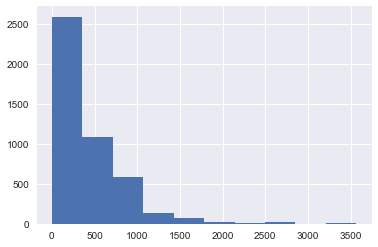

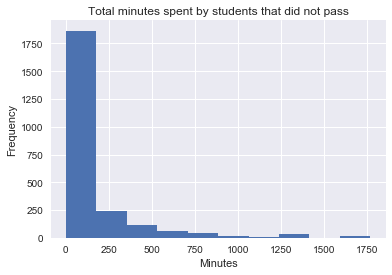

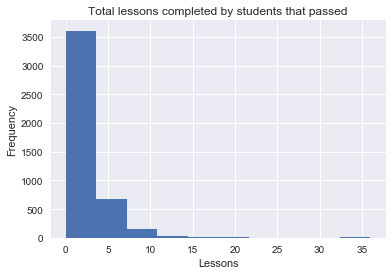

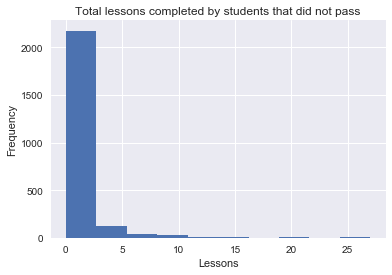

In [330]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

# %matplotlib inline      Needed only for IPython notebook

#%pylab inline

import matplotlib.pyplot as plt
import numpy as np


'''
# below code was used to generate the two plots in one hisstogram
bins = numpy.linspace(0, 10000, 15)
plt.hist(total_minutes_by_account_passed, bins, alpha=0.5, label='Passed')
plt.hist(total_minutes_by_account_not_passed, bins, alpha=0.5, label='Did Not Pass')
plt.legend()

plt.title("Number of minutes attended by students")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()
'''


# Summarize the given data

plt.hist(total_minutes_by_account_passed)
plt.show()


#bins = numpy.linspace(0, 5000, 20)
#plt.hist(total_minutes_by_account_passed, bins)

'''
plt.hist(total_minutes_by_account_passed)
#plt.hist(total_minutes_by_account_passed, bins=[range(10000)])
plt.title("Total minutes spent by students that passed")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
#plt.axis([0, 10000, 0, 5000])

#plt.hist(trip_data['weekday'], bins=[0,1, 2, 3, 4, 5, 6,7])
#plt.hist(trip_data['weekday'], bins=[range('weekday')])
#pyplot.hist(y, bins, alpha=0.5)

plt.show()
'''

plt.hist(total_minutes_by_account_not_passed)
plt.title("Total minutes spent by students that did not pass")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()


plt.hist(total_lessons_completed_by_account_passed)
plt.title("Total lessons completed by students that passed")
plt.xlabel("Lessons")
plt.ylabel("Frequency")
plt.show()

plt.hist(total_lessons_completed_by_account_not_passed)
plt.title("Total lessons completed by students that did not pass")
plt.xlabel("Lessons")
plt.ylabel("Frequency")
plt.show()

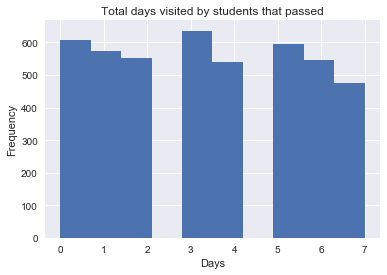

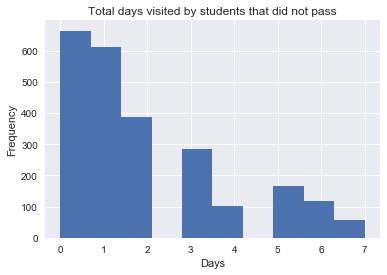

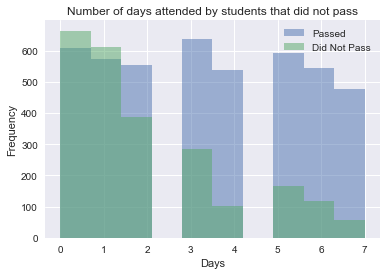

"\nline_up, = plt.plot([1,2,3], label='Line 2')\nline_down, = plt.plot([3,2,1], label='Line 1')\nplt.legend(handles=[line_up, line_down])\n\npassed, = plt.hist(total_days_by_account_passed, bins, alpha=0.5, label='Passed')\nnot_passed, = plt.hist(total_days_by_account_not_passed, bins, alpha=0.5, label='Did Not Pass')\nplt.legend(handles=[passed, not_passed])\n"

In [326]:
#The number of days attended by students that passed and that did not pass plotted together as histograms

import numpy

#histogram=plt.figure()

plt.hist(total_days_by_account_passed)
plt.title("Total days visited by students that passed")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

plt.hist(total_days_by_account_not_passed)
plt.title("Total days visited by students that did not pass")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

# below prints the two histograms into one chart
#bins = numpy.linspace(0, 7, 10)
#bins=[0, 1, 2, 3, 4, 5, 6,7]
#plt.hist(total_days_by_account_passed, bins, alpha=0.5, label='Passed')
#plt.hist(total_days_by_account_not_passed, bins, alpha=0.5, label='Did Not Pass')
plt.hist(total_days_by_account_passed, alpha=0.5, label='Passed')
plt.hist(total_days_by_account_not_passed, alpha=0.5, label='Did Not Pass')
plt.legend()


plt.title("Number of days attended by students that did not pass")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

'''
line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')
plt.legend(handles=[line_up, line_down])

passed, = plt.hist(total_days_by_account_passed, bins, alpha=0.5, label='Passed')
not_passed, = plt.hist(total_days_by_account_not_passed, bins, alpha=0.5, label='Did Not Pass')
plt.legend(handles=[passed, not_passed])
'''

# Improving Plots and Sharing Findings

In [59]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

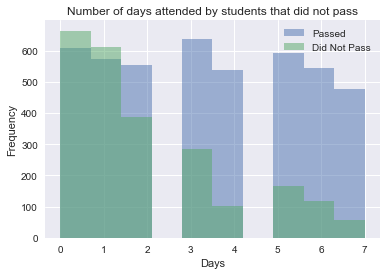

In [333]:
import seaborn as sns

#bins = numpy.linspace(0, 7, 15)
#plt.hist(total_days_by_account_passed, bins, alpha=0.5, label='Passed')
#plt.hist(total_days_by_account_not_passed, bins, alpha=0.5, label='Did Not Pass')
plt.hist(total_days_by_account_passed, alpha=0.5, label='Passed')
plt.hist(total_days_by_account_not_passed, alpha=0.5, label='Did Not Pass')
plt.legend()


plt.title("Number of days attended by students that did not pass")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()